## Elo Merchant Category Recommendation

Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders.



### Evaluation Metrics

Root Mean Squared Error (RMSE)


https://www.kaggle.com/c/elo-merchant-category-recommendation#description

we mainly have 5 data files
1. Train data
2. Test data
3. Historical Transactions(i.e transactions done by different customers at different merchants)
4. New_Merchant_Transactions(i.e it contains only first transaction of each customer with particular merchant)
5. Merchants data

### Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\train.csv')


In [3]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
train.shape

(201917, 6)

In [5]:
test = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\test.csv')


In [6]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [7]:
test.shape

(123623, 5)

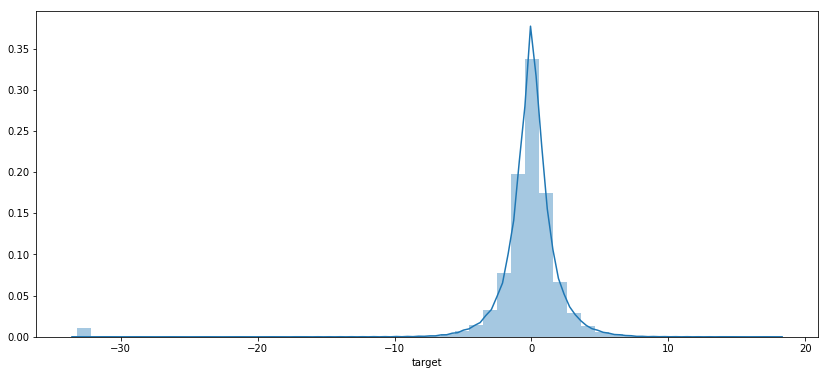

In [8]:
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(train['target'])
plt.show()

We can see most of our target values are between -10 to 10 and only few have target value below -30. since we are dealing with RMSE these few points are crucial for our analysis

In [9]:
(train['target']< -30).sum()

2207

out of 2,01,917 rows we have only 2,207 rows whose target is less than -30(almost 1% of data)

In [10]:
historical_transactions = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\historical_transactions.csv')

In [11]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [12]:
historical_transactions.shape

(29112361, 14)

C:\Users\Nishanth\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


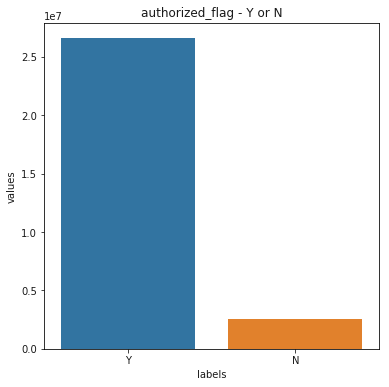

In [13]:
temp = historical_transactions["authorized_flag"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('authorized_flag - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


In [14]:
temp

Y    26595452
N     2516909
Name: authorized_flag, dtype: int64

About 91% of our historical transactions are approved while 9% are denied

C:\Users\Nishanth\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


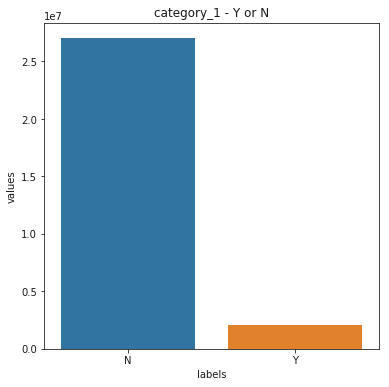

In [15]:
temp = historical_transactions["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('category_1 - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


about 90% of category-1 are Y while rest are N

C:\Users\Nishanth\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


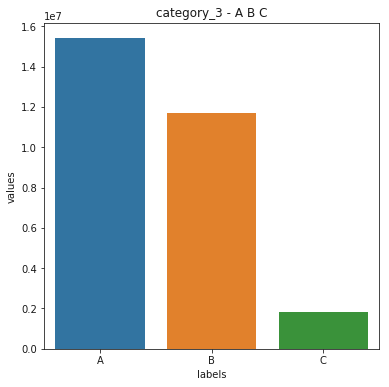

In [17]:
temp = historical_transactions["category_3"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('category_3 - A B C')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


C:\Users\Nishanth\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


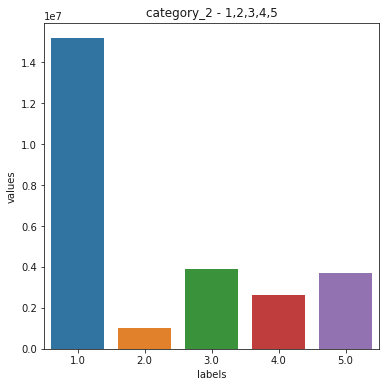

In [18]:
temp = historical_transactions["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('category_2 - 1,2,3,4,5')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


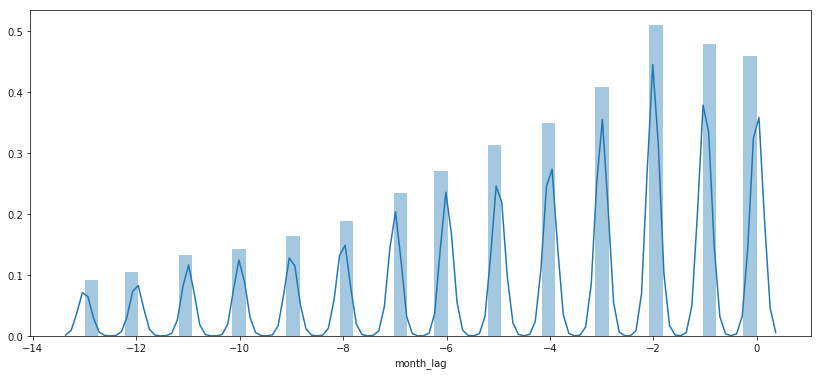

In [21]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(historical_transactions['month_lag'])
plt.show()

histogram of month_lag attribute in historical transactions

C:\Users\Nishanth\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


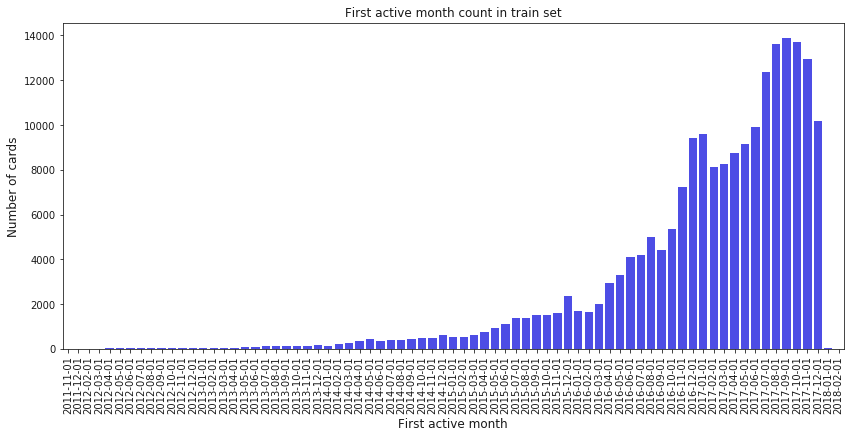

In [34]:
train['first_active_month'] = pd.to_datetime(train['first_active_month'], format = '%Y-%m')
cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()


we can see first active month of cards start from 01-11-2011 to 01-02-2018. we use last date to calculate elapsed time which is a important feature in our model

### feature engineering

In [176]:
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',1000)
train = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\train.csv')
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [177]:
test = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\test.csv')
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [3]:
historical_transactions = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\historical_transactions.csv', parse_dates=['purchase_date'])

In [4]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [5]:
new_transactions = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\new_merchant_transactions.csv',parse_dates=['purchase_date'])

In [6]:
new_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [7]:
def binarize(df):
    for col in ['authorized_flag', 'category_1']:
        df[col] = df[col].map({'Y':1, 'N':0})
    return df

historical_transactions = binarize(historical_transactions)
new_transactions = binarize(new_transactions)


converting category_1 in to binary 

In [8]:
def read_data(df):
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['elapsed_time'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days
    return df


calculating elapse time for each card in our train and test data

In [178]:
import datetime

train = read_data(train)
test = read_data(test)

target = train['target']
del train['target']

In [179]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,elapsed_time
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,306.0
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,396.0
2,2017-08-01,C_ID_b709037bc5,5,1,1,184.0
3,2017-12-01,C_ID_d27d835a9f,2,1,0,62.0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,793.0


In [11]:
historical_transactions['month_diff'] = ((datetime.datetime.today() - historical_transactions['purchase_date']).dt.days)//30
historical_transactions['month_diff'] += historical_transactions['month_lag']

new_transactions['month_diff'] = ((datetime.datetime.today() - new_transactions['purchase_date']).dt.days)//30
new_transactions['month_diff'] += new_transactions['month_lag']


calculating month difference i.e from today to last purchase date of transaction

In [12]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,month_diff
0,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,11
1,1,C_ID_4e6213e9bc,88,0,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,11
2,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,11
3,1,C_ID_4e6213e9bc,88,0,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,11
4,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,11


In [13]:
new_transactions = pd.get_dummies(new_transactions, columns=['category_2', 'category_3'])


In [14]:
historical_transactions = pd.get_dummies(historical_transactions, columns=['category_2', 'category_3'])


In [15]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,state_id,subsector_id,month_diff,category_2_1.0,category_2_2.0,category_2_3.0,category_2_4.0,category_2_5.0,category_3_A,category_3_B,category_3_C
0,1,C_ID_4e6213e9bc,88,0,0,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,16,37,11,1,0,0,0,0,1,0,0
1,1,C_ID_4e6213e9bc,88,0,0,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,16,16,11,1,0,0,0,0,1,0,0
2,1,C_ID_4e6213e9bc,88,0,0,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,16,37,11,1,0,0,0,0,1,0,0
3,1,C_ID_4e6213e9bc,88,0,0,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,16,34,11,1,0,0,0,0,1,0,0
4,1,C_ID_4e6213e9bc,88,0,0,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,16,37,11,1,0,0,0,0,1,0,0


In [16]:
agg_fun = {'authorized_flag': ['mean']}
auth_mean = historical_transactions.groupby(['card_id']).agg(agg_fun)
auth_mean.columns = ['_'.join(col).strip() for col in auth_mean.columns.values]
auth_mean.reset_index(inplace=True)


In [17]:
authorized_transactions = historical_transactions[historical_transactions['authorized_flag'] == 1]
historical_transactions = historical_transactions[historical_transactions['authorized_flag'] == 0]

In [18]:
historical_transactions['purchase_month'] = historical_transactions['purchase_date'].dt.month
authorized_transactions['purchase_month'] = authorized_transactions['purchase_date'].dt.month
new_transactions['purchase_month'] = new_transactions['purchase_date'].dt.month


In [19]:
#reference: https://www.kaggle.com/fabiendaniel/elo-world
def aggregate_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
    'category_1': ['sum', 'mean'],
    'category_2_1.0': ['mean'],
    'category_2_2.0': ['mean'],
    'category_2_3.0': ['mean'],
    'category_2_4.0': ['mean'],
    'category_2_5.0': ['mean'],
    'category_3_A': ['mean'],
    'category_3_B': ['mean'],
    'category_3_C': ['mean'],
    'merchant_id': ['nunique'],
    'merchant_category_id': ['nunique'],
    'state_id': ['nunique'],
    'city_id': ['nunique'],
    'subsector_id': ['nunique'],
    'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
    'installments': ['sum', 'mean', 'max', 'min', 'std'],
    'purchase_month': ['mean', 'max', 'min', 'std'],
    'purchase_date': [np.ptp, 'min', 'max'],
    'month_lag': ['mean', 'max', 'min', 'std'],
    'month_diff': ['mean']
    }
    
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['_'.join(col).strip() for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history


In [20]:
import numpy as np
history = aggregate_transactions(historical_transactions)
history.columns = ['hist_' + c if c != 'card_id' else c for c in history.columns]
history[:5]


,card_id,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_2.0_mean,hist_category_2_3.0_mean,hist_category_2_4.0_mean,hist_category_2_5.0_mean,hist_category_3_A_mean,hist_category_3_B_mean,hist_category_3_C_mean,hist_merchant_id_nunique,hist_merchant_category_id_nunique,hist_state_id_nunique,hist_city_id_nunique,hist_subsector_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_mean,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_mean,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_month_mean,hist_purchase_month_max,hist_purchase_month_min,hist_purchase_month_std,hist_purchase_date_ptp,hist_purchase_date_min,hist_purchase_date_max,hist_month_lag_mean,hist_month_lag_max,hist_month_lag_min,hist_month_lag_std,hist_month_diff_mean
0,C_ID_00007093c1,35,4,0.114286,0.000000,0.000000,0.885714,0.0,0.000000,0.000000,0.828571,0.171429,11,8,2,3,7,-14.401965,-0.411485,1.507069,-0.728876,0.430059,45,1.285714,3,1,0.667367,5.914286,12,1,3.071419,28858113.0,1.489250e+09,1.518108e+09,-6.028571,0,-11,3.535415,10.857143
1,C_ID_0001238066,3,0,0.000000,0.333333,0.000000,0.000000,0.0,0.666667,0.000000,1.000000,0.000000,2,1,2,2,1,-1.789928,-0.596643,-0.596643,-0.596643,0.000000,3,1.000000,1,1,0.000000,8.666667,12,2,5.773503,3609150.0,1.514660e+09,1.518269e+09,-1.333333,0,-2,1.154701,10.333333
2,C_ID_0001506ef0,4,0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.750000,0.250000,0.000000,4,4,1,1,4,-2.905782,-0.726445,-0.708590,-0.740491,0.016203,1,0.250000,1,0,0.500000,5.500000,12,2,4.725816,22098875.0,1.496772e+09,1.518871e+09,-2.500000,0,-8,3.785939,11.000000
3,C_ID_0001793786,27,2,0.074074,0.111111,0.296296,0.111111,0.0,0.000000,0.814815,0.185185,0.000000,17,14,4,8,11,-11.825339,-0.437976,1.236592,-0.745405,0.498150,5,0.185185,1,0,0.395847,6.481481,9,3,2.375684,16780236.0,1.488636e+09,1.505416e+09,-3.518519,-1,-7,2.375684,14.888889
4,C_ID_000183fdda,7,0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.428571,0.571429,4,4,1,1,4,-0.941381,-0.134483,0.334099,-0.714541,0.452741,19,2.714286,6,1,2.288689,8.285714,10,8,0.755929,6701589.0,1.502099e+09,1.508801e+09,-5.714286,-4,-6,0.755929,10.571429


In [ ]:
authorized = aggregate_transactions(authorized_transactions)
authorized.columns = ['auth_' + c if c != 'card_id' else c for c in authorized.columns]
authorized[:5]


,card_id,auth_transactions_count,auth_category_1_sum,auth_category_1_mean,auth_category_2_1.0_mean,auth_category_2_2.0_mean,auth_category_2_3.0_mean,auth_category_2_4.0_mean,auth_category_2_5.0_mean,auth_category_3_A_mean,auth_category_3_B_mean,auth_category_3_C_mean,auth_merchant_id_nunique,auth_merchant_category_id_nunique,auth_state_id_nunique,auth_city_id_nunique,auth_subsector_id_nunique,auth_purchase_amount_sum,auth_purchase_amount_mean,auth_purchase_amount_max,auth_purchase_amount_min,auth_purchase_amount_std,auth_installments_sum,auth_installments_mean,auth_installments_max,auth_installments_min,auth_installments_std,auth_purchase_month_mean,auth_purchase_month_max,auth_purchase_month_min,auth_purchase_month_std,auth_purchase_date_ptp,auth_purchase_date_min,auth_purchase_date_max,auth_month_lag_mean,auth_month_lag_max,auth_month_lag_min,auth_month_lag_std,auth_month_diff_mean
0,C_ID_00007093c1,114,24,0.210526,0.000000,0.000000,0.780702,0.0,0.008772,0.0,0.842105,0.157895,28,18,3,4,13,-62.443076,-0.547746,1.206539,-0.728876,0.237426,147,1.289474,6,1,0.795159,6.517544,12,1,3.371490,32627654.0,1.487081e+09,1.519708e+09,-5.798246,0,-12,3.441495,10.833333
1,C_ID_0001238066,120,2,0.016667,0.783333,0.000000,0.000000,0.0,0.150000,0.0,0.708333,0.266667,65,29,6,18,17,-70.657273,-0.588811,0.768095,-0.734887,0.192614,195,1.625000,10,-1,1.501050,7.275000,12,1,4.895483,13110825.0,1.506638e+09,1.519748e+09,-1.825000,0,-5,1.294218,10.841667
2,C_ID_0001506ef0,62,0,0.000000,0.032258,0.000000,0.967742,0.0,0.000000,1.0,0.000000,0.000000,28,19,2,3,12,-31.696098,-0.511227,1.493545,-0.740491,0.484575,0,0.000000,0,0,0.000000,6.887097,12,1,4.538017,34460275.0,1.484411e+09,1.518871e+09,-4.983871,0,-13,4.248402,10.951613
3,C_ID_0001793786,189,0,0.000000,0.042328,0.359788,0.063492,0.0,0.000000,1.0,0.000000,0.000000,114,45,4,9,22,-24.960674,-0.132067,4.554145,-0.737892,0.867916,0,0.000000,0,0,0.000000,6.698413,10,1,2.301491,24487497.0,1.484994e+09,1.509481e+09,-3.301587,0,-9,2.301491,14.878307
4,C_ID_000183fdda,137,4,0.029197,0.051095,0.007299,0.905109,0.0,0.007299,0.0,0.729927,0.240876,71,34,7,9,20,-67.896557,-0.495595,2.764788,-0.737892,0.523760,245,1.788321,10,-1,2.108912,6.810219,12,1,4.538289,15148616.0,1.504444e+09,1.519592e+09,-2.284672,0,-5,1.782055,10.817518


In [22]:
new = aggregate_transactions(new_transactions)
new.columns = ['new_' + c if c != 'card_id' else c for c in new.columns]
new[:5]
      

,card_id,new_transactions_count,new_category_1_sum,new_category_1_mean,new_category_2_1.0_mean,new_category_2_2.0_mean,new_category_2_3.0_mean,new_category_2_4.0_mean,new_category_2_5.0_mean,new_category_3_A_mean,new_category_3_B_mean,new_category_3_C_mean,new_merchant_id_nunique,new_merchant_category_id_nunique,new_state_id_nunique,new_city_id_nunique,new_subsector_id_nunique,new_purchase_amount_sum,new_purchase_amount_mean,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_mean,new_installments_max,new_installments_min,new_installments_std,new_purchase_month_mean,new_purchase_month_max,new_purchase_month_min,new_purchase_month_std,new_purchase_date_ptp,new_purchase_date_min,new_purchase_date_max,new_month_lag_mean,new_month_lag_max,new_month_lag_min,new_month_lag_std,new_month_diff_mean
0,C_ID_00007093c1,2,0,0.000000,0.500000,0.000000,0.50000,0.0,0.000000,0.0,1.000000,0.000000,2,2,2,2,2,-1.328524,-0.664262,-0.656749,-0.671775,0.010625,2,1.000000,1,1,0.000000,4.000000,4,4,0.000000,537024.0,1.522754e+09,1.523291e+09,2.000000,2,2,0.000000,11.000000
1,C_ID_0001238066,26,2,0.076923,0.769231,0.000000,0.00000,0.0,0.115385,0.0,0.807692,0.153846,25,15,4,8,9,-14.850055,-0.571156,-0.078318,-0.740897,0.173436,42,1.615385,10,-1,2.079941,3.346154,4,3,0.485165,5195343.0,1.519923e+09,1.525118e+09,1.346154,2,1,0.485165,10.807692
2,C_ID_0001506ef0,2,0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,1.0,0.000000,0.000000,1,2,1,1,2,-1.447354,-0.723677,-0.715352,-0.732001,0.011773,0,0.000000,0,0,0.000000,3.000000,3,3,0.000000,471152.0,1.521239e+09,1.521710e+09,1.000000,1,1,0.000000,11.000000
3,C_ID_0001793786,31,0,0.000000,0.483871,0.258065,0.16129,0.0,0.032258,1.0,0.000000,0.000000,31,21,5,7,14,-0.229620,-0.007407,3.129932,-0.737892,0.947223,0,0.000000,0,0,0.000000,11.322581,12,11,0.475191,3981096.0,1.510761e+09,1.514742e+09,1.322581,2,1,0.475191,14.354839
4,C_ID_000183fdda,11,0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,0.0,0.545455,0.363636,11,9,2,2,6,-6.590778,-0.599162,-0.107680,-0.732332,0.182877,16,1.454545,4,-1,1.293340,3.272727,4,3,0.467099,5106807.0,1.519994e+09,1.525100e+09,1.272727,2,1,0.467099,10.727273


In [23]:
#reference : https://www.kaggle.com/fabiendaniel/elo-world
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_lag'])

    agg_func = {
            'purchase_amount': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            'installments': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'std'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group
#----------------------------------
final_group =  aggregate_per_month(authorized_transactions) 
final_group[:10]


,card_id,month_lag_mean,month_lag_std,purchase_amount_count_mean,purchase_amount_count_std,purchase_amount_sum_mean,purchase_amount_sum_std,purchase_amount_mean_mean,purchase_amount_mean_std,purchase_amount_min_mean,purchase_amount_min_std,purchase_amount_max_mean,purchase_amount_max_std,purchase_amount_std_mean,purchase_amount_std_std,installments_count_mean,installments_count_std,installments_sum_mean,installments_sum_std,installments_mean_mean,installments_mean_std,installments_min_mean,installments_min_std,installments_max_mean,installments_max_std,installments_std_mean,installments_std_std
0,C_ID_00007093c1,-6.000000,3.894440,8.769231,3.539158,-4.803314,2.175011,-0.536131,0.075418,-0.702649,0.041293,-0.126683,0.446167,0.197339,0.120199,8.769231,3.539158,11.307692,4.210792,1.369646,0.423190,1.000000,0.000000,2.538462,1.613246,0.625428,0.675607
1,C_ID_0001238066,-2.500000,1.870829,20.000000,11.696153,-11.776212,6.676914,-0.603215,0.046045,-0.730351,0.002699,-0.160977,0.485869,0.151393,0.093832,20.000000,11.696153,32.500000,24.501020,1.652873,0.410539,0.666667,0.816497,4.666667,2.875181,1.256525,0.521292
2,C_ID_0001506ef0,-6.230769,4.225988,4.769231,4.342692,-2.438161,2.902501,-0.446660,0.271125,-0.725724,0.011212,0.161333,0.748701,0.496308,0.415117,4.769231,4.342692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,C_ID_0001793786,-4.500000,3.027650,18.900000,12.160501,-2.496067,4.018810,-0.005687,0.271221,-0.646277,0.166230,2.190924,1.290775,0.880276,0.259048,18.900000,12.160501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,C_ID_000183fdda,-2.500000,1.870829,22.833333,7.167054,-11.316093,4.800612,-0.489227,0.141015,-0.728405,0.009876,1.151797,1.062785,0.472149,0.315407,22.833333,7.167054,40.833333,14.048725,1.834943,0.362557,0.333333,1.032796,9.166667,2.041241,2.144389,0.665529
5,C_ID_00024e244b,-6.384615,4.330867,4.076923,4.290717,-2.557396,2.089708,-0.685118,0.071894,-0.728885,0.016051,-0.425292,0.813979,0.108521,0.208719,4.076923,4.290717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,C_ID_0002709b5a,-5.000000,3.316625,6.090909,3.505839,-3.994622,2.440540,-0.638637,0.060836,-0.700104,0.030670,-0.546063,0.092512,0.076295,0.051724,6.090909,3.505839,10.727273,8.427229,1.965729,1.287108,0.818182,0.603023,3.818182,3.341203,1.600058,1.734256
7,C_ID_00027503e2,-4.000000,2.738613,2.666667,1.224745,-1.974976,0.909525,-0.740077,0.002424,-0.742206,0.003025,-0.737762,0.002652,0.003165,0.001086,2.666667,1.224745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,C_ID_000298032a,-5.250000,4.334249,3.500000,1.772811,-1.844563,0.699127,-0.590214,0.168008,-0.686623,0.020383,-0.210304,1.127668,0.213951,0.442601,3.500000,1.772811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,C_ID_0002ba3c2e,-4.666667,3.141125,9.166667,4.665476,-5.843052,3.021165,-0.638037,0.044976,-0.721448,0.026047,-0.387276,0.222295,0.107390,0.060790,9.166667,4.665476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
def successive_aggregates(df, field1, field2):
    t = df.groupby(['card_id', field1])[field2].mean()
    u = pd.DataFrame(t).reset_index().groupby('card_id')[field2].agg(['mean', 'min', 'max', 'std'])
    u.columns = [field1 + '_' + field2 + '_' + col for col in u.columns.values]
    u.reset_index(inplace=True)
    return u


In [25]:
additional_fields = successive_aggregates(new_transactions, 'category_1', 'purchase_amount')
additional_fields = additional_fields.merge(successive_aggregates(new_transactions, 'installments', 'purchase_amount'),
                                            on = 'card_id', how='left')
additional_fields = additional_fields.merge(successive_aggregates(new_transactions, 'city_id', 'purchase_amount'),
                                            on = 'card_id', how='left')
additional_fields = additional_fields.merge(successive_aggregates(new_transactions, 'category_1', 'installments'),
                                            on = 'card_id', how='left')


In [26]:
additional_fields.head()

,card_id,category_1_purchase_amount_mean,category_1_purchase_amount_min,category_1_purchase_amount_max,category_1_purchase_amount_std,installments_purchase_amount_mean,installments_purchase_amount_min,installments_purchase_amount_max,installments_purchase_amount_std,city_id_purchase_amount_mean,city_id_purchase_amount_min,city_id_purchase_amount_max,city_id_purchase_amount_std,category_1_installments_mean,category_1_installments_min,category_1_installments_max,category_1_installments_std
0,C_ID_00007093c1,-0.664262,-0.664262,-0.664262,NaN,-0.664262,-0.664262,-0.664262,NaN,-0.664262,-0.671775,-0.656749,0.010625,1.000000,1.000000,1.000000,NaN
1,C_ID_0001238066,-0.607445,-0.650332,-0.564558,0.060652,-0.423876,-0.625781,-0.152008,0.222019,-0.558208,-0.666997,-0.472178,0.072679,2.479167,1.458333,3.500000,1.443676
2,C_ID_0001506ef0,-0.723677,-0.723677,-0.723677,NaN,-0.723677,-0.723677,-0.723677,NaN,-0.723677,-0.723677,-0.723677,NaN,0.000000,0.000000,0.000000,NaN
3,C_ID_0001793786,-0.007407,-0.007407,-0.007407,NaN,-0.007407,-0.007407,-0.007407,NaN,-0.247073,-0.572976,0.249425,0.346873,0.000000,0.000000,0.000000,NaN
4,C_ID_000183fdda,-0.599162,-0.599162,-0.599162,NaN,-0.491234,-0.696173,-0.107680,0.233882,-0.572076,-0.605181,-0.538971,0.046817,1.454545,1.454545,1.454545,NaN


In [180]:
train = pd.merge(train, history, on='card_id', how='left')
test = pd.merge(test, history, on='card_id', how='left')

train = pd.merge(train, authorized, on='card_id', how='left')
test = pd.merge(test, authorized, on='card_id', how='left')

train = pd.merge(train, new, on='card_id', how='left')
test = pd.merge(test, new, on='card_id', how='left')

train = pd.merge(train, final_group, on='card_id', how='left')
test = pd.merge(test, final_group, on='card_id', how='left')

train = pd.merge(train, auth_mean, on='card_id', how='left')
test = pd.merge(test, auth_mean, on='card_id', how='left')

train = pd.merge(train, additional_fields, on='card_id', how='left')
test = pd.merge(test, additional_fields, on='card_id', how='left')


In [ ]:
historical_transactions = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\historical_transactions.csv')

In [29]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [30]:
from datetime import datetime
year = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ).year
month = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ).month


In [31]:
historical_transactions['year'] = historical_transactions['purchase_date'].map(year)
historical_transactions['month'] = historical_transactions['purchase_date'].map(month)


In [190]:
a = historical_transactions.groupby('card_id')['year'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','year1']
a = a.reset_index()


In [191]:
a2 = a[a['year'] == 2018]
a2.columns = ['year','card_id','year_2018']
a2 = a2.drop('year', axis=1)


In [192]:
train = pd.merge(train,a2,on='card_id',how="left")

test = pd.merge(test,a2,on='card_id',how="left")

In [193]:
a = historical_transactions.groupby('card_id')['month'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','month1']
a = a.reset_index()


In [194]:
a3 = a[a['month'] == 3]
a3.columns = ['month','card_id','month_3']
a3 = a3.drop('month', axis=1)

a4 = a[a['month'] == 4]
a4.columns = ['month','card_id','month_4']
a4 = a4.drop('month', axis=1)

a11 = a[a['month'] == 11]
a11.columns = ['month','card_id','month_11']
a11 = a11.drop('month', axis=1)

a12 = a[a['month'] == 12]
a12.columns = ['month','card_id','month_12']
a12 = a12.drop('month', axis=1)


In [195]:
train = pd.merge(train,a3,on='card_id',how="left")
train = pd.merge(train,a4,on='card_id',how="left")
train = pd.merge(train,a11,on='card_id',how="left")
train = pd.merge(train,a12,on='card_id',how="left")

test = pd.merge(test,a3,on='card_id',how="left")
test = pd.merge(test,a4,on='card_id',how="left")
test = pd.merge(test,a11,on='card_id',how="left")
test = pd.merge(test,a12,on='card_id',how="left")


In [40]:
new_df = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\new_merchant_transactions.csv')

In [41]:
new_df['year'] = new_df['purchase_date'].map(year)
new_df['month'] = new_df['purchase_date'].map(month)


In [196]:
a = new_df.groupby('card_id')['year'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','year1']
a = a.reset_index()


In [197]:
a2 = a[a['year'] == 2018]
a2.columns = ['year','card_id','new_year_2018']
a2 = a2.drop('year', axis=1)


In [198]:
train = pd.merge(train,a2,on='card_id',how="left")

test = pd.merge(test,a2,on='card_id',how="left")


In [199]:
a = new_df.groupby('card_id')['month'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','month1']
a = a.reset_index()


In [200]:
a4 = a[a['month'] == 4]
a4.columns = ['month','card_id','new_month_4']
a4 = a4.drop('month', axis=1)

a3 = a[a['month'] == 3]
a3.columns = ['month','card_id','new_month_3']
a3 = a3.drop('month', axis=1)


In [201]:
train = pd.merge(train,a4,on='card_id',how="left")
train = pd.merge(train,a3,on='card_id',how="left")

test = pd.merge(test,a4,on='card_id',how="left")
test = pd.merge(test,a3,on='card_id',how="left")


In [202]:
a = historical_transactions.groupby('card_id')['merchant_id'].value_counts()
a = pd.DataFrame(a)
a.columns = ['top_3_merchants_visited']

In [203]:
a1 = a.groupby(level='card_id')['top_3_merchants_visited'].nlargest(3).reset_index(level=0, drop=True).reset_index()


In [204]:
a1['top_3_merchants_visited'] = a1['top_3_merchants_visited'].apply(str)
a3 = a1.groupby('card_id')['top_3_merchants_visited'].apply(' '.join).reset_index()
a3 = a3.join(a3['top_3_merchants_visited'].str.split(' ', expand=True).add_prefix('top_3_merchants_visited'))
a3 = a3.drop('top_3_merchants_visited', axis=1)

In [205]:
a3["top_3_merchants_visited0"] = pd.to_numeric(a3["top_3_merchants_visited0"])
a3["top_3_merchants_visited1"] = pd.to_numeric(a3["top_3_merchants_visited1"])
a3["top_3_merchants_visited2"] = pd.to_numeric(a3["top_3_merchants_visited2"])


In [206]:
train = pd.merge(train,a3,on='card_id',how="left")

test = pd.merge(test,a3,on='card_id',how="left")


In [207]:
a = new_df.groupby('card_id')['month_lag'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','total_no_of_2_month_lag']
a = a.reset_index()


In [208]:
a1 = a[a['month_lag'] == 1]
a1.columns = ['month_lag','card_id','new_total_no_of_1_lag']
a1 = a1.drop('month_lag', axis=1)

a2 = a[a['month_lag'] == 2]
a2.columns = ['month_lag','card_id','new_total_no_of_2_lag']
a2 = a2.drop('month_lag', axis=1)


In [209]:
train = pd.merge(train,a1,on='card_id',how="left")
train = pd.merge(train,a2,on='card_id',how="left")

test = pd.merge(test,a1,on='card_id',how="left")
test = pd.merge(test,a2,on='card_id',how="left")


In [210]:
a = historical_transactions.groupby('card_id')['subsector_id'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','total_no_of_subsectors_visited']
a = a.reset_index()


In [211]:
a33 = a[a['subsector_id'] == 33]
a33.columns = ['state_id','card_id','total_no_of_33_subsector_visited']
a33 = a33.drop('state_id', axis=1)

a37 = a[a['subsector_id'] == 37]
a37.columns = ['state_id','card_id','total_no_of_37_subsector_visited']
a37 = a37.drop('state_id', axis=1)


In [212]:
train = pd.merge(train,a33,on='card_id',how="left")
train = pd.merge(train,a37,on='card_id',how="left")

test = pd.merge(test,a33,on='card_id',how="left")
test = pd.merge(test,a37,on='card_id',how="left")


In [213]:
a = historical_transactions.groupby('card_id')['month_lag'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','total_no_of_14_month_lag']
a = a.reset_index()


In [214]:
a1 = a[a['month_lag'] == 0]
a1.columns = ['month_lag','card_id','total_no_of_0_lag']
a1 = a1.drop('month_lag', axis=1)

a2 = a[a['month_lag'] == -1]
a2.columns = ['month_lag','card_id','total_no_of_-1_lag']
a2 = a2.drop('month_lag', axis=1)

a3 = a[a['month_lag'] == -2]
a3.columns = ['month_lag','card_id','total_no_of_-2_lag']
a3 = a3.drop('month_lag', axis=1)

a4 = a[a['month_lag'] == -3]
a4.columns = ['month_lag','card_id','total_no_of_-3_lag']
a4 = a4.drop('month_lag', axis=1)

a5 = a[a['month_lag'] == -4]
a5.columns = ['month_lag','card_id','total_no_of_-4_lag']
a5 = a5.drop('month_lag', axis=1)



In [215]:
train = pd.merge(train,a1,on='card_id',how="left")
train = pd.merge(train,a2,on='card_id',how="left")
train = pd.merge(train,a3,on='card_id',how="left")
train = pd.merge(train,a4,on='card_id',how="left")
train = pd.merge(train,a5,on='card_id',how="left")

test = pd.merge(test,a1,on='card_id',how="left")
test = pd.merge(test,a2,on='card_id',how="left")   
test = pd.merge(test,a3,on='card_id',how="left")
test = pd.merge(test,a4,on='card_id',how="left")
test = pd.merge(test,a5,on='card_id',how="left")   


In [216]:
a = historical_transactions.groupby('card_id')['category_1'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','total_no_of_Y_N']
a = a.reset_index()


In [217]:
a2 = a[a['category_1'] =='Y']
a2.columns = ['category_1','card_id','total_no_of_Y_cat1']
a2 = a2.drop('category_1', axis=1)

In [218]:
train = pd.merge(train,a2,on='card_id',how="left")

test = pd.merge(test,a2,on='card_id',how="left")

In [219]:
a = new_df.groupby('card_id')['installments'].value_counts()
a = pd.DataFrame(a)
a = a.reset_index(level=['card_id'])
a.columns = ['card_id','total_no_of_15_install']
a = a.reset_index()


In [220]:
a1 = a[a['installments'] == 0]
a1.columns = ['installments','card_id','new_total_no_of_0_install']
a1 = a1.drop('installments', axis=1)


In [221]:
train = pd.merge(train,a1,on='card_id',how="left")

test = pd.merge(test,a1,on='card_id',how="left")


In [222]:
train.to_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\s_train3.csv',index=False)

In [223]:
test.to_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\s_test3.csv',index=False)

In [262]:
train = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\s_train3.csv')
#train = train.drop('Unnamed: 0', 1)
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_2.0_mean,hist_category_2_3.0_mean,hist_category_2_4.0_mean,hist_category_2_5.0_mean,hist_category_3_A_mean,hist_category_3_B_mean,hist_category_3_C_mean,hist_merchant_id_nunique,hist_merchant_category_id_nunique,hist_state_id_nunique,hist_city_id_nunique,hist_subsector_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_mean,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_mean,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_month_mean,hist_purchase_month_max,hist_purchase_month_min,hist_purchase_month_std,hist_purchase_date_ptp,hist_purchase_date_min,hist_purchase_date_max,hist_month_lag_mean,hist_month_lag_max,hist_month_lag_min,hist_month_lag_std,hist_month_diff_mean,auth_transactions_count,auth_category_1_sum,auth_category_1_mean,auth_category_2_1.0_mean,auth_category_2_2.0_mean,auth_category_2_3.0_mean,auth_category_2_4.0_mean,auth_category_2_5.0_mean,auth_category_3_A_mean,auth_category_3_B_mean,auth_category_3_C_mean,auth_merchant_id_nunique,auth_merchant_category_id_nunique,auth_state_id_nunique,auth_city_id_nunique,auth_subsector_id_nunique,auth_purchase_amount_sum,auth_purchase_amount_mean,auth_purchase_amount_max,auth_purchase_amount_min,auth_purchase_amount_std,auth_installments_sum,auth_installments_mean,auth_installments_max,auth_installments_min,auth_installments_std,auth_purchase_month_mean,auth_purchase_month_max,auth_purchase_month_min,auth_purchase_month_std,auth_purchase_date_ptp,auth_purchase_date_min,auth_purchase_date_max,auth_month_lag_mean,auth_month_lag_max,auth_month_lag_min,auth_month_lag_std,auth_month_diff_mean,new_transactions_count,new_category_1_sum,new_category_1_mean,new_category_2_1.0_mean,new_category_2_2.0_mean,new_category_2_3.0_mean,new_category_2_4.0_mean,new_category_2_5.0_mean,new_category_3_A_mean,new_category_3_B_mean,new_category_3_C_mean,new_merchant_id_nunique,new_merchant_category_id_nunique,new_state_id_nunique,new_city_id_nunique,new_subsector_id_nunique,new_purchase_amount_sum,new_purchase_amount_mean,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_mean,new_installments_max,new_installments_min,new_installments_std,new_purchase_month_mean,new_purchase_month_max,new_purchase_month_min,new_purchase_month_std,new_purchase_date_ptp,new_purchase_date_min,new_purchase_date_max,new_month_lag_mean,new_month_lag_max,new_month_lag_min,new_month_lag_std,new_month_diff_mean,month_lag_mean,month_lag_std,purchase_amount_count_mean,purchase_amount_count_std,purchase_amount_sum_mean,purchase_amount_sum_std,purchase_amount_mean_mean,purchase_amount_mean_std,purchase_amount_min_mean,purchase_amount_min_std,purchase_amount_max_mean,purchase_amount_max_std,purchase_amount_std_mean,purchase_amount_std_std,installments_count_mean,installments_count_std,installments_sum_mean,installments_sum_std,installments_mean_mean,installments_mean_std,installments_min_mean,installments_min_std,installments_max_mean,installments_max_std,installments_std_mean,installments_std_std,authorized_flag_mean,category_1_purchase_amount_mean,category_1_purchase_amount_min,category_1_purchase_amount_max,category_1_purchase_amount_std,installments_purchase_amount_mean,installments_purchase_amount_min,installments_purchase_amount_max,installments_purchase_amount_std,city_id_purchase_amount_mean,city_id_purchase_amount_min,city_id_purchase_amount_max,city_id_purchase_amount_std,category_1_installments_mean,category_1_installments_min,category_1_installments_max,category_1_installments_std,year_2018,month_3,month_4,month_11,month_12,new_year_2018,new_month_4,new_month_3,top_3_merchants_visited0,top_3_merchants_visited1,top_3_merchants_visited2,new_total_no_of_1_lag,new_total_no_of_2_lag,tota

In [263]:
test = pd.read_csv('C:\\Users\\Nishanth\\Anaconda3\\Untitled Folder\\Elo\\s_test3.csv')
#test = test.drop('Unnamed: 0',1)
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_2.0_mean,hist_category_2_3.0_mean,hist_category_2_4.0_mean,hist_category_2_5.0_mean,hist_category_3_A_mean,hist_category_3_B_mean,hist_category_3_C_mean,hist_merchant_id_nunique,hist_merchant_category_id_nunique,hist_state_id_nunique,hist_city_id_nunique,hist_subsector_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_mean,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_mean,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_month_mean,hist_purchase_month_max,hist_purchase_month_min,hist_purchase_month_std,hist_purchase_date_ptp,hist_purchase_date_min,hist_purchase_date_max,hist_month_lag_mean,hist_month_lag_max,hist_month_lag_min,hist_month_lag_std,hist_month_diff_mean,auth_transactions_count,auth_category_1_sum,auth_category_1_mean,auth_category_2_1.0_mean,auth_category_2_2.0_mean,auth_category_2_3.0_mean,auth_category_2_4.0_mean,auth_category_2_5.0_mean,auth_category_3_A_mean,auth_category_3_B_mean,auth_category_3_C_mean,auth_merchant_id_nunique,auth_merchant_category_id_nunique,auth_state_id_nunique,auth_city_id_nunique,auth_subsector_id_nunique,auth_purchase_amount_sum,auth_purchase_amount_mean,auth_purchase_amount_max,auth_purchase_amount_min,auth_purchase_amount_std,auth_installments_sum,auth_installments_mean,auth_installments_max,auth_installments_min,auth_installments_std,auth_purchase_month_mean,auth_purchase_month_max,auth_purchase_month_min,auth_purchase_month_std,auth_purchase_date_ptp,auth_purchase_date_min,auth_purchase_date_max,auth_month_lag_mean,auth_month_lag_max,auth_month_lag_min,auth_month_lag_std,auth_month_diff_mean,new_transactions_count,new_category_1_sum,new_category_1_mean,new_category_2_1.0_mean,new_category_2_2.0_mean,new_category_2_3.0_mean,new_category_2_4.0_mean,new_category_2_5.0_mean,new_category_3_A_mean,new_category_3_B_mean,new_category_3_C_mean,new_merchant_id_nunique,new_merchant_category_id_nunique,new_state_id_nunique,new_city_id_nunique,new_subsector_id_nunique,new_purchase_amount_sum,new_purchase_amount_mean,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_mean,new_installments_max,new_installments_min,new_installments_std,new_purchase_month_mean,new_purchase_month_max,new_purchase_month_min,new_purchase_month_std,new_purchase_date_ptp,new_purchase_date_min,new_purchase_date_max,new_month_lag_mean,new_month_lag_max,new_month_lag_min,new_month_lag_std,new_month_diff_mean,month_lag_mean,month_lag_std,purchase_amount_count_mean,purchase_amount_count_std,purchase_amount_sum_mean,purchase_amount_sum_std,purchase_amount_mean_mean,purchase_amount_mean_std,purchase_amount_min_mean,purchase_amount_min_std,purchase_amount_max_mean,purchase_amount_max_std,purchase_amount_std_mean,purchase_amount_std_std,installments_count_mean,installments_count_std,installments_sum_mean,installments_sum_std,installments_mean_mean,installments_mean_std,installments_min_mean,installments_min_std,installments_max_mean,installments_max_std,installments_std_mean,installments_std_std,authorized_flag_mean,category_1_purchase_amount_mean,category_1_purchase_amount_min,category_1_purchase_amount_max,category_1_purchase_amount_std,installments_purchase_amount_mean,installments_purchase_amount_min,installments_purchase_amount_max,installments_purchase_amount_std,city_id_purchase_amount_mean,city_id_purchase_amount_min,city_id_purchase_amount_max,city_id_purchase_amount_std,category_1_installments_mean,category_1_installments_min,category_1_installments_max,category_1_installments_std,year_2018,month_3,month_4,month_11,month_12,new_year_2018,new_month_4,new_month_3,top_3_merchants_visited0,top_3_merchants_visited1,top_3_merchants_visited2,new_total_no_of_1_lag,new_total_no_of_2_lag,tota

### Model : LightGBM

In [273]:
train = train.drop(['auth_category_3_A_mean','new_month_lag_min','new_category_2_2.0_mean','new_category_3_A_mean','hist_installments_min'],axis=1)

test = test.drop(['auth_category_3_A_mean','new_month_lag_min','new_category_2_2.0_mean','new_category_3_A_mean','hist_installments_min'],axis=1)

In [275]:
features = [c for c in train.columns if c not in ['card_id', 'first_active_month']]
#features = [f for f in features if f not in unimportant_features]
categorical_feats = ['feature_2', 'feature_3']

In [276]:
#reference: https://www.kaggle.com/fabiendaniel/elo-world
param = {'num_leaves': 111,
         'min_data_in_leaf': 149, 
         'objective':'regression',
         'max_depth': 9,
         'learning_rate': 0.005,
         "boosting": "gbdt",
         "feature_fraction": 0.7522,
         "bagging_freq": 1,
         "bagging_fraction": 0.7083 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2634,
         "random_state": 133,
         "verbosity": -1}


In [277]:
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [278]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_2.0_mean,hist_category_2_3.0_mean,hist_category_2_4.0_mean,hist_category_2_5.0_mean,hist_category_3_A_mean,hist_category_3_B_mean,hist_category_3_C_mean,hist_merchant_id_nunique,hist_merchant_category_id_nunique,hist_state_id_nunique,hist_city_id_nunique,hist_subsector_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_mean,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_mean,hist_installments_max,hist_installments_std,hist_purchase_month_mean,hist_purchase_month_max,hist_purchase_month_min,hist_purchase_month_std,hist_purchase_date_ptp,hist_purchase_date_min,hist_purchase_date_max,hist_month_lag_mean,hist_month_lag_max,hist_month_lag_min,hist_month_lag_std,hist_month_diff_mean,auth_transactions_count,auth_category_1_sum,auth_category_1_mean,auth_category_2_1.0_mean,auth_category_2_2.0_mean,auth_category_2_3.0_mean,auth_category_2_4.0_mean,auth_category_2_5.0_mean,auth_category_3_B_mean,auth_category_3_C_mean,auth_merchant_id_nunique,auth_merchant_category_id_nunique,auth_state_id_nunique,auth_city_id_nunique,auth_subsector_id_nunique,auth_purchase_amount_sum,auth_purchase_amount_mean,auth_purchase_amount_max,auth_purchase_amount_min,auth_purchase_amount_std,auth_installments_sum,auth_installments_mean,auth_installments_max,auth_installments_min,auth_installments_std,auth_purchase_month_mean,auth_purchase_month_max,auth_purchase_month_min,auth_purchase_month_std,auth_purchase_date_ptp,auth_purchase_date_min,auth_purchase_date_max,auth_month_lag_mean,auth_month_lag_max,auth_month_lag_min,auth_month_lag_std,auth_month_diff_mean,new_transactions_count,new_category_1_sum,new_category_1_mean,new_category_2_1.0_mean,new_category_2_3.0_mean,new_category_2_4.0_mean,new_category_2_5.0_mean,new_category_3_B_mean,new_category_3_C_mean,new_merchant_id_nunique,new_merchant_category_id_nunique,new_state_id_nunique,new_city_id_nunique,new_subsector_id_nunique,new_purchase_amount_sum,new_purchase_amount_mean,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_mean,new_installments_max,new_installments_min,new_installments_std,new_purchase_month_mean,new_purchase_month_max,new_purchase_month_min,new_purchase_month_std,new_purchase_date_ptp,new_purchase_date_min,new_purchase_date_max,new_month_lag_mean,new_month_lag_max,new_month_lag_std,new_month_diff_mean,month_lag_mean,month_lag_std,purchase_amount_count_mean,purchase_amount_count_std,purchase_amount_sum_mean,purchase_amount_sum_std,purchase_amount_mean_mean,purchase_amount_mean_std,purchase_amount_min_mean,purchase_amount_min_std,purchase_amount_max_mean,purchase_amount_max_std,purchase_amount_std_mean,purchase_amount_std_std,installments_count_mean,installments_count_std,installments_sum_mean,installments_sum_std,installments_mean_mean,installments_mean_std,installments_min_mean,installments_min_std,installments_max_mean,installments_max_std,installments_std_mean,installments_std_std,authorized_flag_mean,category_1_purchase_amount_mean,category_1_purchase_amount_min,category_1_purchase_amount_max,category_1_purchase_amount_std,installments_purchase_amount_mean,installments_purchase_amount_min,installments_purchase_amount_max,installments_purchase_amount_std,city_id_purchase_amount_mean,city_id_purchase_amount_min,city_id_purchase_amount_max,city_id_purchase_amount_std,category_1_installments_mean,category_1_installments_min,category_1_installments_max,category_1_installments_std,year_2018,month_3,month_4,month_11,month_12,new_year_2018,new_month_4,new_month_3,top_3_merchants_visited0,top_3_merchants_visited1,top_3_merchants_visited2,new_total_no_of_1_lag,new_total_no_of_2_lag,total_no_of_33_subsector_visited,total_no_of_37_subsector_visited,total_no_of_0_lag,total_no_of_-1_lag,total_no_o

In [280]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features],
                           label=target.iloc[trn_idx],
                           categorical_feature=categorical_feats
                          )
    val_data = lgb.Dataset(train.iloc[val_idx][features],
                           label=target.iloc[val_idx],
                           categorical_feature=categorical_feats
                          )

    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 200)
    
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

fold n°0


C:\Users\Nishanth\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\Nishanth\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.71192	valid_1's rmse: 3.77554
[200]	training's rmse: 3.64103	valid_1's rmse: 3.72744
[300]	training's rmse: 3.59536	valid_1's rmse: 3.70421
[400]	training's rmse: 3.56266	valid_1's rmse: 3.69175
[500]	training's rmse: 3.53806	valid_1's rmse: 3.68435
[600]	training's rmse: 3.51752	valid_1's rmse: 3.6798
[700]	training's rmse: 3.50031	valid_1's rmse: 3.67682
[800]	training's rmse: 3.48488	valid_1's rmse: 3.67484
[900]	training's rmse: 3.47031	valid_1's rmse: 3.67344
[1000]	training's rmse: 3.45743	valid_1's rmse: 3.67222
[1100]	training's rmse: 3.44448	valid_1's rmse: 3.6713
[1200]	training's rmse: 3.43212	valid_1's rmse: 3.67084
[1300]	training's rmse: 3.41944	valid_1's rmse: 3.67027
[1400]	training's rmse: 3.40749	valid_1's rmse: 3.67004
[1500]	training's rmse: 3.39615	valid_1's rmse: 3.66973
[1600]	training's rmse: 3.38556	valid_1's rmse: 3.66948
[1700]	training's rmse: 3.37563	valid_1's rmse: 3.66

got CV Score for RMSE as 3.65225

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Nishanth\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


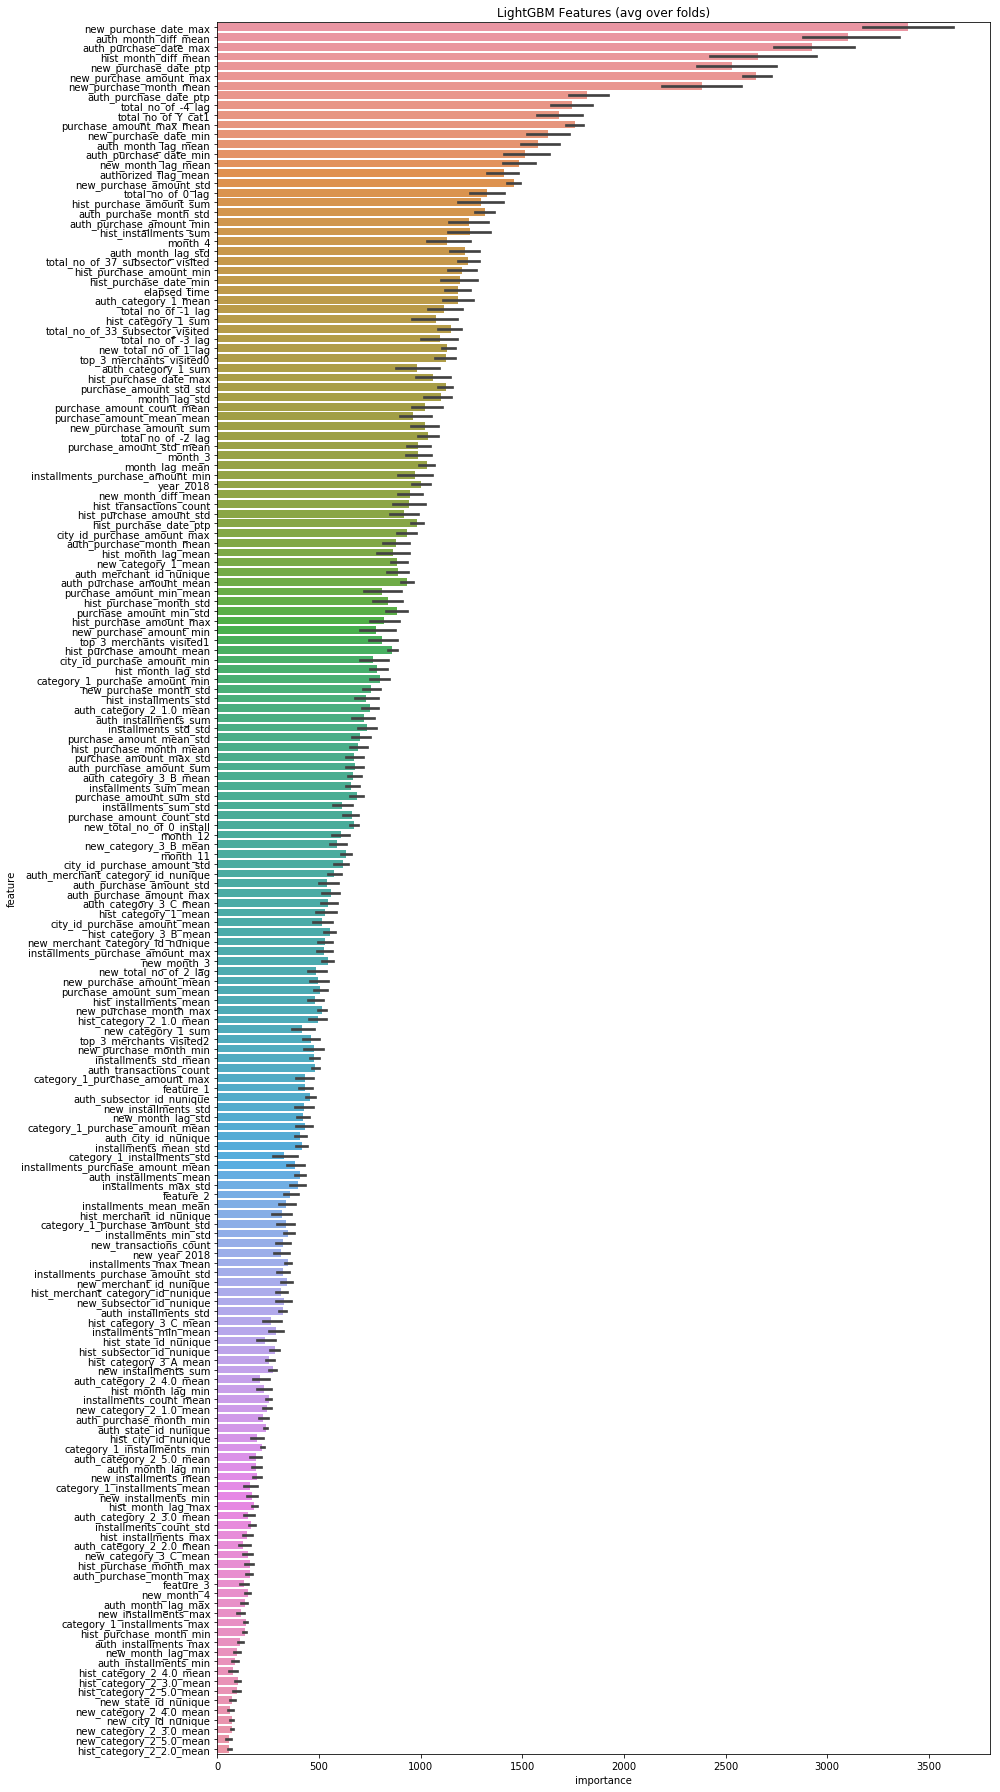

In [282]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,25))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances1.png')
plt.show()

In [283]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("submit3.csv", index=False)

In [284]:
len(train.columns)

180

### conclusion

1. Used 180 odd features

2. Got RMSE CV score 3.65225 and leader board RMSE score 3.7000( rank at leader board: 1130/ 2804)